In this section we will perform exploratory data analyis for our dataset that comprises of about 200,000 news headlines from HuffPost from 2012 to 2018.

To begin, we first need to import all the necessary libraries to work and import our dataset.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopw = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRACHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Importing the dataset
df = pd.read_json('F:\\New folder\\New folder desktop\\News_Category_Dataset_v2.json', lines='True') #Reading the file as a json object per line.
df.columns #Index(['authors', 'category', 'date', 'headline', 'link', 'short_description'], dtype='object')
df.shape  #(124989, 6)

(200853, 6)

In [ ]:
df # a glimpse of our dataset.

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [ ]:
# let us see how many category types we have in our dataset.
df.category.nunique()

41

In [ ]:
df.category.unique() # there are 41 different types of category present and their names mentioned below.


array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

To analyse the share of each category in the dataset we get their value counts to check whether the data is bias or not to work with.

In [ ]:
print("We have a total of {} categories".format(dataset['category'].nunique()))
dataset['category'].value_counts()

We have a total of 41 categories


POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

As we can see in our dataset there are many news categories which are very close to each other in meaning. For example, we have "Arts and Culture" and "Arts" as two separate categories which is not required as they both contain the same type of context. Another example are the categories "College" and "Education". So the first step is to reduce the number of categories by combining the ones very close to each other under one single roof for which we are using a groupper method which will receive the categories to group and the new name for the combined category as input.

In [ ]:
# from https://www.kaggle.com/derinrobert/newsclassification-using-lstm
categories = df['category'].value_counts().index

def groupper(grouplist,name):
    for ele in categories:
        if ele in grouplist:
            df.loc[df['category'] == ele, 'category'] = name

In [ ]:
groupper( grouplist= ['BUSINESS' ,  'MONEY'] , name =  'FINANCE')

groupper( grouplist= ['THE WORLDPOST' , 'WORLDPOST' , 'WORLD NEWS'] , name =  'WORLDNEWS')

groupper( grouplist= ['ENVIRONMENT' ,'GREEN'] , name =  'ENVIRONMENT')

groupper( grouplist= ['TECH', 'SCIENCE'] , name =  'TECHNOLOGY')

groupper( grouplist= ['WELLNESS', 'HEALTHY LIVING'] , name =  'HEALTH')

groupper( grouplist= [ 'PARENTING', 'PARENTS'] , name =  'PARENTING')

groupper( grouplist= [ 'EDUCATION' ,'COLLEGE'] , name =  'EDUCATION')

groupper( grouplist= ['FOOD & DRINK', 'TASTE'] , name =  'FOOD')

groupper( grouplist= ['STYLE & BEAUTY' ,'STYLE'] , name =  'STYLE')

groupper( grouplist= ['ARTS & CULTURE','CULTURE & ARTS','ARTS'] , name =  'ART-CULTURE')

groupper( grouplist= ['WOMEN','QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name =  'EMPOWERED VOICES')

groupper( grouplist= ['HOME & LIVING','TRAVEL'] , name =  'TRAVEL AND LIVING')

groupper( grouplist= ['WEDDINGS', 'DIVORCE'] , name =  'MARRIAGE')

groupper( grouplist= ['SPORTS','ENTERTAINMENT' , 'COMEDY','WEIRD NEWS'] , name =  'SPORTS AND ENTERTAINMENT')

groupper( grouplist= ['FIFTY' , 'IMPACT' ,'GOOD NEWS','MEDIA'] , name =  'GENERAL')

groupper( grouplist= ['CRIME',  'RELIGION'] , name =  'CRIME AND RELIGION')

In [ ]:
groupper( grouplist= ['BUSINESS' ,  'MONEY'] , name =  'FINANCE')

groupper( grouplist= ['THE WORLDPOST' , 'WORLDPOST' , 'WORLD NEWS'] , name =  'WORLDNEWS')

groupper( grouplist= ['ENVIRONMENT' ,'GREEN'] , name =  'ENVIRONMENT')

groupper( grouplist= ['TECH', 'SCIENCE'] , name =  'TECHNOLOGY')

groupper( grouplist= ['WELLNESS', 'HEALTHY LIVING'] , name =  'HEALTH')

groupper( grouplist= [ 'PARENTING', 'PARENTS'] , name =  'PARENTING')

groupper( grouplist= [ 'EDUCATION' ,'COLLEGE'] , name =  'EDUCATION')

groupper( grouplist= ['FOOD & DRINK', 'TASTE'] , name =  'FOOD')

groupper( grouplist= ['STYLE & BEAUTY' ,'STYLE'] , name =  'STYLE')

groupper( grouplist= ['ARTS & CULTURE','CULTURE & ARTS','ARTS'] , name =  'ART-CULTURE')

groupper( grouplist= ['WOMEN','QUEER VOICES', 'LATINO VOICES', 'BLACK VOICES'] , name =  'EMPOWERED VOICES')

groupper( grouplist= ['HOME & LIVING','TRAVEL'] , name =  'TRAVEL AND LIVING')

groupper( grouplist= ['WEDDINGS', 'DIVORCE'] , name =  'MARRIAGE')

groupper( grouplist= ['SPORTS','ENTERTAINMENT' , 'COMEDY','WEIRD NEWS'] , name =  'SPORTS AND ENTERTAINMENT')

groupper( grouplist= ['FIFTY' , 'IMPACT' ,'GOOD NEWS','MEDIA'] , name =  'GENERAL')

groupper( grouplist= ['CRIME',  'RELIGION'] , name =  'CRIME AND RELIGION')

Now let us analyse the value count for these new categories.

In [ ]:
print("We have a total of {} categories".format(df['category'].nunique()))
df['category'].value_counts()

We have a total of 17 categories


POLITICS                    32739
SPORTS AND ENTERTAINMENT    28787
HEALTH                      24521
EMPOWERED VOICES            15461
TRAVEL AND LIVING           14082
PARENTING                   12632
STYLE                       11903
GENERAL                      9073
WORLDNEWS                    8420
FOOD                         8322
FINANCE                      7644
MARRIAGE                     7077
CRIME AND RELIGION           5961
TECHNOLOGY                   4260
ENVIRONMENT                  3945
ART-CULTURE                  3878
EDUCATION                    2148
Name: category, dtype: int64

We will visualise the share of every category in the dataset for which we are using the matplotlib library.

([<matplotlib.patches.Wedge at 0x1e6a7237548>,
 [Text(0.9589004709686384, 0.5389896907883523, 'POLITICS'),
  Text(0.10584691037563594, 1.0948956258767009, 'SPORTS AND ENTERTAINMENT'),
  Text(-0.7396268847088973, 0.8142186877097651, 'HEALTH'),
  Text(-1.07629105927444, 0.2271509536099387, 'EMPOWERED VOICES'),
  Text(-1.0646810854595496, -0.2765035013606075, 'TRAVEL AND LIVING'),
  Text(-0.860882094769147, -0.6847496030709952, 'PARENTING'),
  Text(-0.5418894053350017, -0.9572647869767688, 'STYLE'),
  Text(-0.2045190733356874, -1.0808200352704016, 'GENERAL'),
  Text(0.09513856405686742, -1.0958780286278202, 'WORLDNEWS'),
  Text(0.37559962553238607, -1.0338882537779077, 'FOOD'),
  Text(0.6194641947897217, -0.9089907102790006, 'FINANCE'),
  Text(0.8105704895940025, -0.7436232119826137, 'MARRIAGE'),
  Text(0.9443725765948673, -0.5640571217310989, 'CRIME AND RELIGION'),
  Text(1.0221217972652483, -0.4065304804750301, 'TECHNOLOGY'),
  Text(1.0657456356209665, -0.2723715112761659, 'ENVIRONMENT'

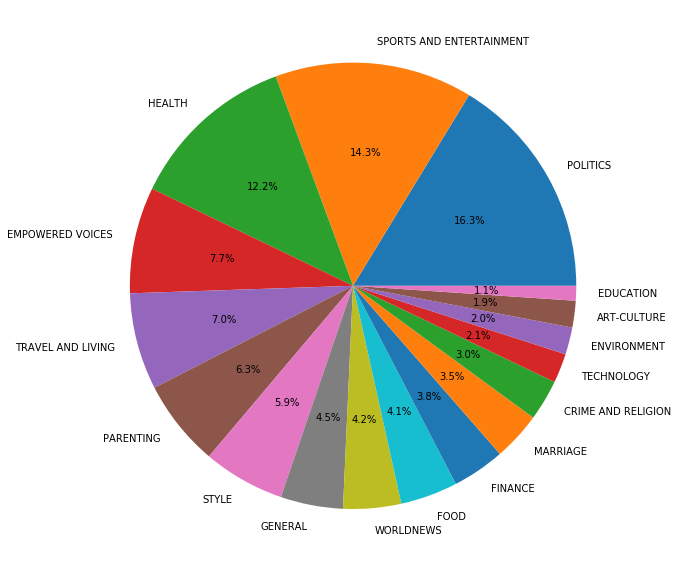

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,20))
plt.pie(df['category'].value_counts().values, 
        labels=df['category'].value_counts().index,
        autopct='%1.1f%%')

As we can see that we are dealing with an imbalanced dataset since the four most well represented categories "Politics", "Sports and Entertainment", "Health" and "Empowered Voices" make up 50 percent of all the data samples. So we need to balance our dataset so as to not result in bias decisions. In order to have dataset balanced we are taking equal number of rows for every category. 

In [ ]:
#removing duplicates to avoid inconsistency.

In [ ]:
df.duplicated().sum() 

13

In [ ]:
df.drop_duplicates(keep='last', inplace=True) 

In [ ]:
df.duplicated().sum() 

0

In [ ]:
df.duplicated(subset=['short_description','headline']).sum()

475

In [ ]:
df.drop_duplicates(subset=['short_description','headline'],keep='last',inplace=True)

In [ ]:
df.duplicated(subset=['short_description','headline']).sum()

0

In [ ]:
############ to get equal no of rows for all types of categories #########################

In [ ]:
# since we have imbalanced dataset, so one way is we can take sab categories mei se equal number of rows making it balanced.
# taken from https://www.kaggle.com/imdevskp/news-category-classification
# container for dfs
dfs = []

# loop through each category and get 1004 rows and append to dfs
for category in df['category'].unique():
    temp = df[df['category']==category]
    dfs.append(temp.sample(2140)) #2140 is the minimum number available for each category
    
# concatenate dataframes
df = pd.concat(dfs)

# shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

# first few rows
df.head()

,category,headline,authors,link,short_description,date,categoryEncoded
0,HEALTH,Vindication for Lazy Parents (Like Me),"Maria Rodale, Contributor\nCEO and Chairman of...",https://www.huffingtonpost.com/entry/vindicati...,"Kids need to learn how to fail, take responsib...",2014-04-07,8
1,HEALTH,4 Foods to Soothe Sore Muscles,"EatingWell, Contributor\nWhere Good Taste Meet...",https://www.huffingtonpost.com/entry/exercise-...,Making sure your workout is challenging withou...,2012-01-29,8
2,FINANCE,Coca-Cola's Latest Environmental Victory Is Mo...,Emily Peck,https://www.huffingtonpost.com/entry/coca-cola...,The company is replenishing the water it used ...,2015-08-25,5
3,EMPOWERED VOICES,Black Twitter Users Say No To Trump And Yes To...,Zahara Hill,https://www.huffingtonpost.com/entry/black-twi...,Some users wanted no parts of Trump's inaugura...,2017-01-20,3
4,WORLDNEWS,From Brothers To Enemies: How Syria’s War Has ...,"Ahmad Zaza, Syria Deeply",https://www.huffingtonpost.com/entry/syria-war...,A portrait of how Syria’s war has carved homes...,2017-01-18,16


After performing above code, we will visualise the share of every category in the dataset for which we are using the matplotlib library.

([<matplotlib.patches.Wedge at 0x20193fd7ac8>,
 [Text(1.0812704095131431, 0.20212447034260855, 'PARENTING'),
  Text(0.9352388481066135, 0.5790753810966367, 'POLITICS'),
  Text(0.6628980969955887, 0.8778189522900649, 'EMPOWERED VOICES'),
  Text(0.3010292839807241, 1.0580082089407683, 'ART-CULTURE'),
  Text(-0.10149520219603578, 1.0953075932956853, 'TECHNOLOGY'),
  Text(-0.49031219881092686, 0.9846796167775559, 'FINANCE'),
  Text(-0.8129098155749743, 0.741065200735982, 'HEALTH'),
  Text(-1.025719456448182, 0.39736582221379624, 'EDUCATION'),
  Text(-1.0999999999999999, -1.2873678832584484e-08, 'SPORTS AND ENTERTAINMENT'),
  Text(-1.0257194471471633, -0.39736584622249266, 'WORLDNEWS'),
  Text(-0.8129097982290913, -0.7410652197635093, 'FOOD'),
  Text(-0.4903121757628369, -0.9846796282541409, 'STYLE'),
  Text(-0.10149517655851131, -1.0953075956713516, 'TRAVEL AND LIVING'),
  Text(0.3010293087451929, -1.0580082018946695, 'GENERAL'),
  Text(0.6628981175424233, -0.8778189367738154, 'CRIME AND R

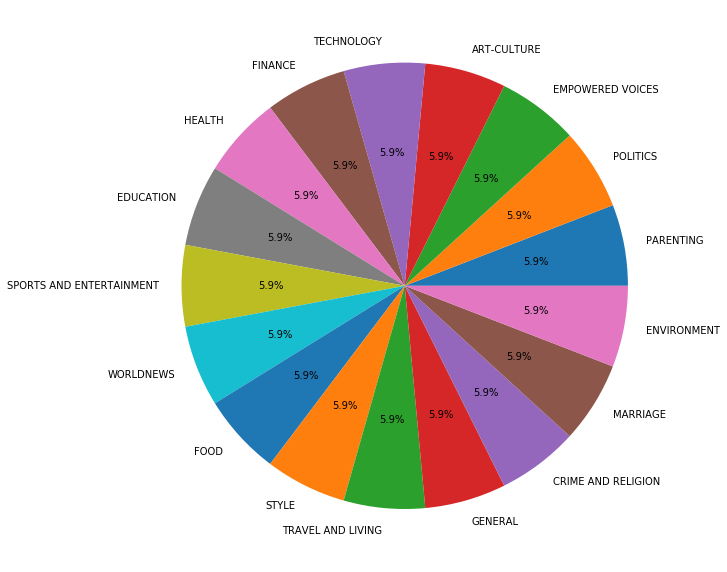

In [ ]:
# let us visualise the pie chart for every category after we did the above code
#import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,20))
plt.pie(df['category'].value_counts().values, 
        labels=df['category'].value_counts().index,
        autopct='%1.1f%%')

We can see that the above pie chart is balanced, so our dataset is balanced now.

In [ ]:
print("We have a total of {} categories".format(df['category'].nunique()))
df['category'].value_counts()

We have a total of 17 categories


HEALTH                      2140
FOOD                        2140
CRIME AND RELIGION          2140
TRAVEL AND LIVING           2140
FINANCE                     2140
TECHNOLOGY                  2140
GENERAL                     2140
ENVIRONMENT                 2140
MARRIAGE                    2140
POLITICS                    2140
WORLDNEWS                   2140
EDUCATION                   2140
STYLE                       2140
ART-CULTURE                 2140
PARENTING                   2140
SPORTS AND ENTERTAINMENT    2140
EMPOWERED VOICES            2140
Name: category, dtype: int64

Now we will find out the suitable value to be taken for maximum sequnce length to be chosen for padding and truncation which we can use for training our BERT model.

In [ ]:
#calculating the length of headlines and descriptions
df['descr_len'] = df['short_description'].apply(lambda x: len(str(x).split()))
df['headline_len'] = df['headline'].apply(lambda x: len(str(x).split()))

In [ ]:
df.describe() # max length for desc is 243 and for headline is 44

,descr_len,headline_len
count,200365.000000,200365.000000
mean,11.762259,9.000145
std,8.090121,3.121708
min,0.000000,0.000000
25%,6.000000,7.000000
50%,12.000000,9.000000
75%,15.000000,11.000000
max,150.000000,42.000000


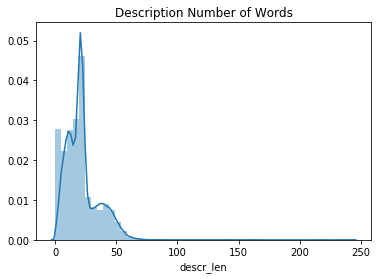

In [ ]:
import seaborn as sns
sns.distplot(df['descr_len'])
plt.title('Description Number of Words')
plt.show()
# most of them have desc_length which describes the short_description have length of less than 50 and very few are above that

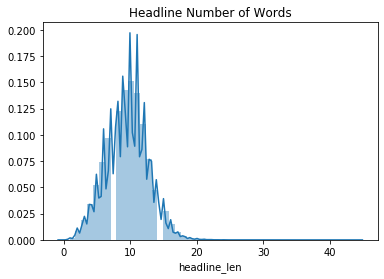

In [ ]:
sns.distplot(df['headline_len'])
plt.title('Headline Number of Words')
plt.show()
# most of them have headline length of less than 20 and very few above that

In [ ]:
#to check if some headlines are empty
print(len(df[df['headline'] == ""])) # so there are 2 headlines which are empty
# after preprocessing there were 9 headlines which were empty

9


In [ ]:
print(len(df[df['short_description'] == ""])) # so there are many(19611) where no description is provided 

19611


In [ ]:
#Since we will pass their concatenation input to BERT, lets merge them and obtain the length.

In [ ]:
df['desc'] = df['headline'].astype(str)+"-"+df['short_description']
df.drop(columns =['headline','short_description'],axis = 1, inplace=True)
df.astype(str)
df.head()

,category,authors,link,date,categoryEncoded,desc
0,HEALTH,"Maria Rodale, Contributor\nCEO and Chairman of...",https://www.huffingtonpost.com/entry/vindicati...,2014-04-07,8,Vindication for Lazy Parents (Like Me)-Kids ne...
1,HEALTH,"EatingWell, Contributor\nWhere Good Taste Meet...",https://www.huffingtonpost.com/entry/exercise-...,2012-01-29,8,4 Foods to Soothe Sore Muscles-Making sure you...
2,FINANCE,Emily Peck,https://www.huffingtonpost.com/entry/coca-cola...,2015-08-25,5,Coca-Cola's Latest Environmental Victory Is Mo...
3,EMPOWERED VOICES,Zahara Hill,https://www.huffingtonpost.com/entry/black-twi...,2017-01-20,3,Black Twitter Users Say No To Trump And Yes To...
4,WORLDNEWS,"Ahmad Zaza, Syria Deeply",https://www.huffingtonpost.com/entry/syria-war...,2017-01-18,16,From Brothers To Enemies: How Syria’s War Has ...


In [ ]:
column = df["describe"]
max_value = column.max()
min_value = column.min()
min_value
max_value # maximum value is 244.

244

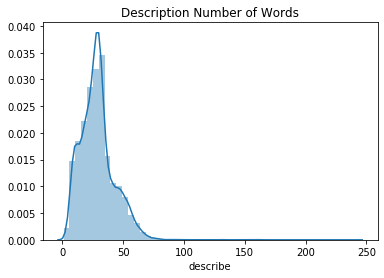

In [ ]:
df['describe'] = df['desc'].apply(lambda x: len(str(x).split()))
sns.distplot(df['describe'])
plt.title('Description Number of Words')
plt.show()

We can easily understand that most of the messages have length of 75 words or less whereas the maximum length is around 250. So if we choose 250 as the maximum sequence length then all our sentences will have length of 250 and in such scenario most of the tokens in these sequences will be the padding tokens, it will not contribute to help the model learn something useful. Apart from this it will also result in slow training time. Therefore, we will select 75 as the maximum sequence length since most of the sequences lie in that range.